<function matplotlib.pyplot.show(close=None, block=None)>

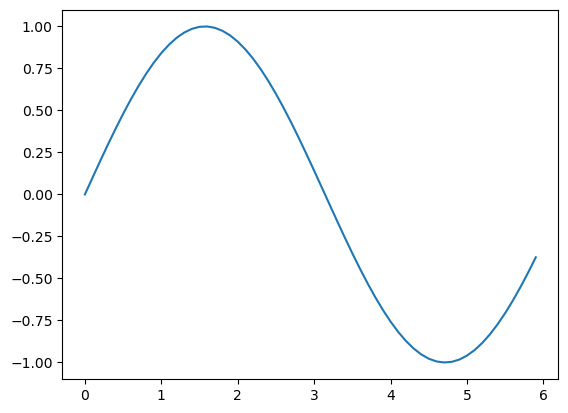

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,6,0.1)
y = np.sin(x)

plt.plot(x, y)
plt.show

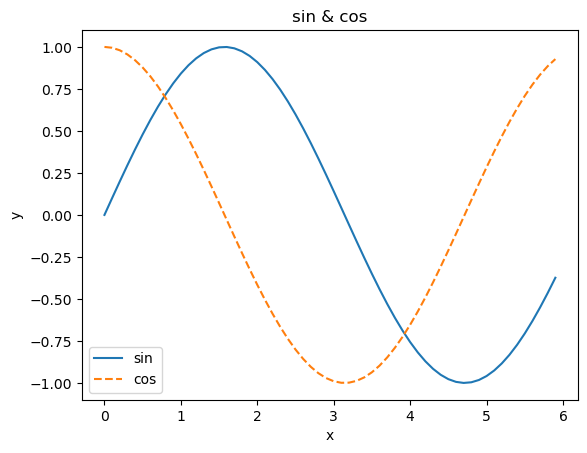

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,6,0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1,label = "sin")
plt.plot(x,y2,linestyle = "--", label = "cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title('sin & cos')
plt.legend()
plt.show()

In [40]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0 
    elif tmp > theta:
        return 1

AND(0,0)
AND(1,0)
AND(0,1)
AND(1,1)

1

In [41]:
#편향을 매개변수로 설정

def AND(x1,x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1,x2):
    x = np.array([x1, x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1,x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
#XOR은 비선형 영역이다. 곡선으로 나눠야함. (즉, 위처럼 퍼셉트론으로 표현불가)

In [42]:
#다층 퍼셉트론으로 AND,NAND,OR을 활용한 XOR 게이트 구현

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

XOR(0, 0)
XOR(1, 0)
XOR(0, 1)
XOR(1, 1)

0

In [43]:
#신경망
#계단함수 구현하기(비선형 함수)

def step_function(x):   # 실수만 인수로 받아들임
    if x > 0:
        return 1
    else:
        return 0
    
def step_function(x):
    y = x > 0
    return y.astype(np.int) #넘파이 메서드를 이용한 방법

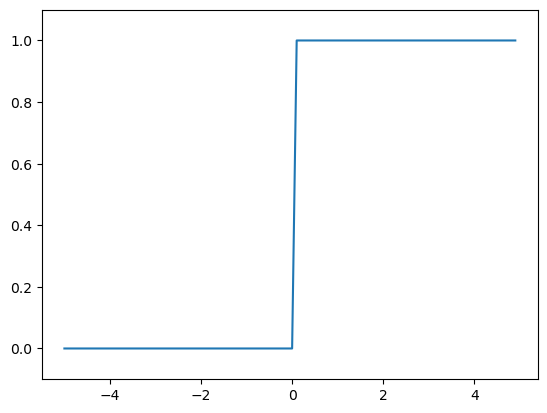

In [44]:
#계단함수 그래프 그리기
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


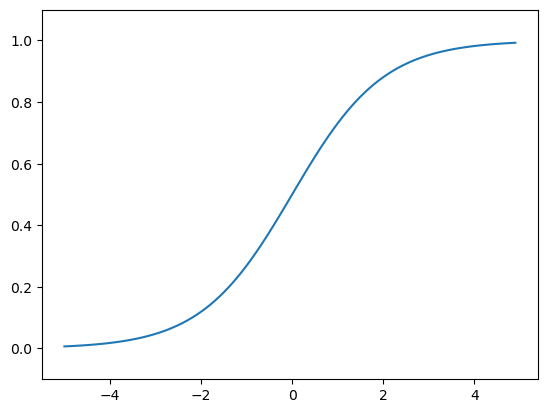

In [45]:
#시그모이드 함수 구현 및 그리기(비선형 함수)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

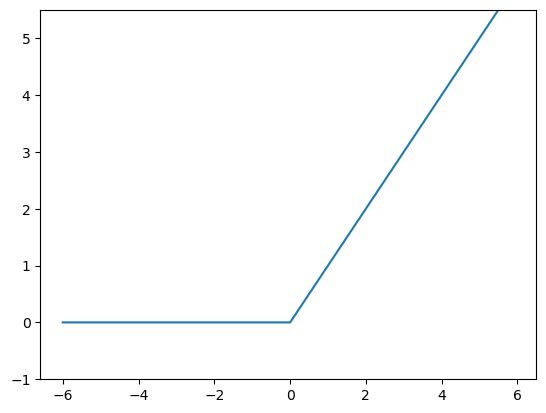

In [46]:
#ReLU 함수 : 입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하이면 0을 출력

def relu(x):
    return np.maximum(0, x)

x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5.5)
plt.show()

In [47]:
#다차원 배열(넘파이 다차원 배열을 활용해서 신경망 구현)

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1 # 가중치, 편향 다 계산한 값에 활성화 함수 sigmoid 적용
print(A1)

Z1 = sigmoid(A1)
print(Z1)

#0층에서 1층가는 과정

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)

Z2 = sigmoid(A2)
print(Z2)

#1층에서 2층가는 과정

def identity_function(x):       #출력층의 활성화 함수로 이용
    return X

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

print(Z2.shape)
print(W3.shape)
print(B3.shape)

A3 = np.dot(Z2, W3) + B3
print(A3)

Y = identity_function(A3)
print(Y)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
(2,)
(2, 2)
(2,)
[0.31682708 0.69627909]
[1.  0.5]


In [48]:
#3층 신경망 구현 정리

def init_network():             #가중치와 편향을 초기화하고 딕셔너리 변수인 network에 저장
    network = {}                #각 층에 필요한 매개변수(가중치,편향)를 저장
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):        #입력 신호를 출력을 변환하는 처리 과정을 모두 구현(순방향)
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[1.  0.5]


In [49]:
#출력층 설계하기
#기계학습 문제는 분류(소프트맥스 함수)와 회귀(항등 함수)로 나뉜다.
#분류는 데이터가 어느 클레스에 속하느냐, 회귀는 입력 데이터에서 수치를 예측하는 문제

#항등 함수는 입력을 그대로 출력
#소프트맥스 함수는 출력층의 각 뉴런이 모든 입력 신호에서 영향받음

#소프트맥스 함수 구현

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

#지수 함수 때문에 오버플로 문제가 생긴다.
#개선 사항으로 수식에 임의의 정수를 곱해주는데 입력 신호 중 최댓값을 이용하는게 일반적.
#출력은 0에서 1사이, 총합은 1 => 출력을 확률로 해석가능

In [50]:
#출력층 뉴런 수 정하기
#분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

#예시(손글씨 숫자 분류, 추론 과정만 구현 => 신경망의 순전파)
import sys, os
sys.path.append(os.pardir)
from datasets.mnist import load_mnist
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False) #normalize는 입력 이미지의 픽셀 값을 0~1상의의 값으로 정규화할지를 정함.
                                                                                 #flatten은 입력 이미지를 평탄한 1차원 배열로 만들지를 결정.
                                                                                 #one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지를 결정.

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [51]:
#MNIST 이미지 출력해보기

import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)            #(784,)
img = img.reshape(28,28)    #원래 이미지의 모양으로 변형
print(img.shape)            #(28,28)

img_show(img)

5
(784,)
(28, 28)


In [52]:
#MNIST 데이터셋을 가지고 추론을 수행하는 신경망 구현
#입력층 784개(28*28), 출력층 10개(0~9) , 첫번째 은닉층 50개, 두번째 은닉층 100개
#import pickle



def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)        #정규화(데이터를 특정 범위로 변환처리), 전처리(입력 데이터에 특정 변환을 가하는 것)
    return x_test, t_test                                                    #여기서는 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행

def init_network():                             #pickle 파일인 sample_weight.pkl에 저장된 '학습딘 가중치 매개변수'를 읽는다.
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network              



def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

#정확도 평가

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)                #확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [53]:
#배치 처리
#위에서는 1장의 이미지를 입력한 것, 이제는 100장의 이미지를 입력한다.
#입력 데이터 형상은 100X784, 출력 데이터 형상은 100X10 

x, t = get_data()
network = init_network()

batch_size = 100 #배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):               #0부터 len(x)까지 100간격으로 증가하는 리스트 반환
    x_batch = x[i:i+batch_size]                      #입력 데이터를 묶는다(100장씩)
    y_batch = predict(network, x_batch)         
    p = np.argmax(y_batch, axis = 1)                 #axis = 1은 100x10 배열 중 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록 한 것
    accuracy_cnt += np.sum(p == t[i:i+batch_size])   #배치 단위로 분류한 결과를 실제 답과 비교

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [ ]:
#신경망 학습
#학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
#신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 소개. 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표.
#손실 함수의 값을 가급적 작게 만드는 기법으로 함수의 기울기를 활용하는 경사법을 소개.

#기계학습에서 데이터가 중요. 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다. 
#이때 특징은 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다. (비전 분야 : SIFT, SURF / 기계학습 : SVM, KNN)

#데이터 취급 시 주의할 점.
#기계학습 문제는 데이터를 훈련, 시험으로 나눠 학습과 실험을 수행하는 것이 일반적이다. (나누는 이유 => 범용적으로 사용할 수 있는 모델이기 때문)
#데이터셋 하나로만 학습과 평가를 수행하면 올바르지 않다. 한 데이터셋에만 지나치게 최적화된 상태 => 오버피팅

#손실함수는 일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용.

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

#엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [4]:
#미니배치 학습 (여러개의 훈련 데이터가 있을 때)
#훈련 데이터가 빅데이터 수준이 된다면 일부만 골라 학습을 수행 => 이 일부를 미니배치라고 함 => 이 무작위 데이터를 학습하는 것이 미니배치 학습

import sys, os
sys.path.append(os.pardir)
import numpy as np
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)


#여기서 무작위로 10장만 빼내려면 어떻게 하는가.

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


(60000, 784)
(60000, 10)
(10, 10)


In [ ]:
#(배치용) 교차 엔트로피 오차 구현하기
#데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size      #정답 레이블이 원-핫 인코딩

    #return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size      정답 레이블이 숫자로 주어질 때

In [ ]:
#왜 손실 함수를 설정하는가(정확도 지표를 왜 사용하지 않는가)
#미분의 역할에 주목하면 된다. 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게 하는 값을 찾는다. 이때 매개변수의 미분을 계산학 . 그 값을 단서로 서서히 갱신하는 과정 반복
#미분 값이 음수 => 가중치 매개변수를 양의 방향으로, 미분 값이 양수 => 가중치 매개변수를 음의 방향으로, 미분 값이 0 => 어느 방향으로 해도 달라지지 않음
#정확도는 대부분의 장소에서 미분 값이 0이 되어 지표로 삼기에 적절하지 못하다.

#수치 미분

def numerical_diff(f, x):
    h = 10e-50                      #개선 포인트 : 10^-4 를 이용
    return (f(x + h) - f(x)) / h    #개선 포인트 : 진정한 미분은 x 위치의 함수 기울기이지만 구현에서는 (x+h)와 x 사이의 기울기에 해당 => (x+h)와 (x-h)일때의 차분 이용

#개선 사항 적용

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

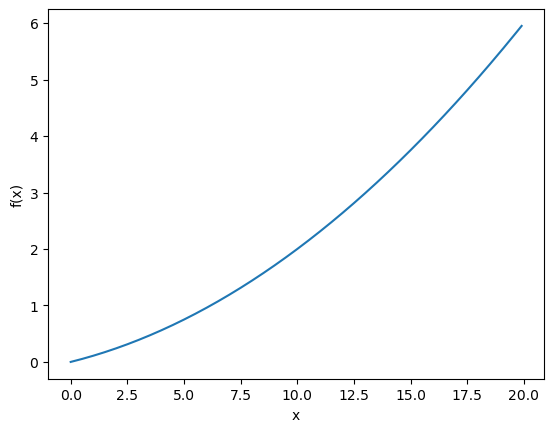

0.1999999999990898
0.2999999999986347


In [8]:
#수치 미분 예시

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

#x=5, 10에서 미분

a = numerical_diff(function_1, 5)
b = numerical_diff(function_1, 10)

print(a)
print(b)

0.1999999999990898


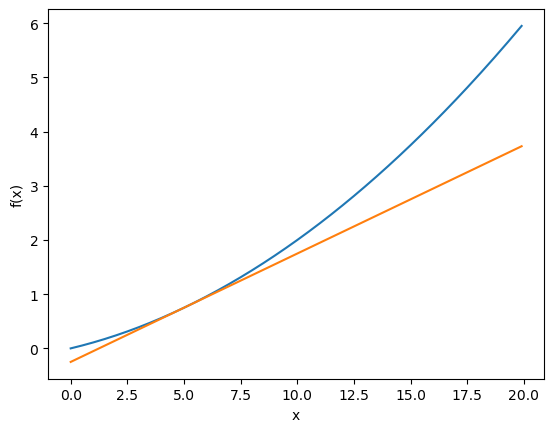

In [22]:
#x=5에서 미분한 접선 그래프
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [16]:
#편미분(앞의 예와 달리 변수가 2개)

def function_2(x):
    return x[0]**2 + x[1]**2 


#예시
def function_3(x):
    return x*x + 4.0**2.0

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

a = numerical_diff(function_3, 3.0)
b = numerical_diff(function_3, 4.0)

print(a)
print(b)




6.00000000000378
7.999999999999119


In [18]:
#기울기(모든 변수의 편미분을 벡터로 정리한 것)

def numerical_gradient(f, x):
    h = 1e-4                    #0.0001
    grad = np.zeros_like(x)     #x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]        
        #f(x+h) 계산

        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val        #값 복원
    return grad

def function_2(x):
    return x[0]**2 + x[1]**2 

a = numerical_gradient(function_2, np.array([3.0, 4.0]))
b = numerical_gradient(function_2, np.array([0.0, 2.0]))
c = numerical_gradient(function_2, np.array([3.0, 0.0]))

print(a)
print(b)
print(c)

        

[6. 8.]
[0. 4.]
[6. 0.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


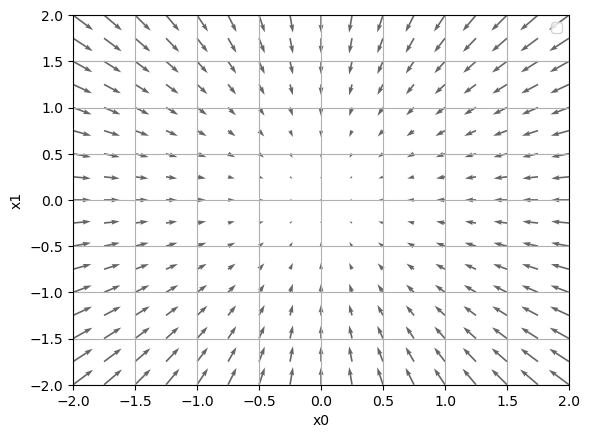

In [19]:
#위 코드 기울기의 의미
#기울기 결과에 마이너스를 붙인 벡터를 그려본다.
#기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향을 의미

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [23]:
#경사법(경사 하강법)
#학습 시에 최적의 매개변수를 찾아야 함. 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다. 
#매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 알아내기 어려움 => 기울기를 이용해 함수의 최솟값을 찾으려는 것이 경사법
#주의할 점은 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지는 보장할 수 없다. 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니지만, 그 방향으로 가야 값을 줄일 수 있다.
#경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동. 그런 다음 이동한 곳에서도 기울기 구하고, 또 그 방향으로 나아가기를 반복. => 이렇게 해서 값을 점차 줄이는 것
#에타(기호)는 갱신하는 양을 나타낸다. 학습률이라고 부름. 매개변수 값을 얼마나 갱신하느냐를 정하는 것.
#학습률 값은 0.01, 0.001 등 미리 특정 값으로 정해둬야함. 이 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행.

#경사 하강법 구현

def gradient_descent(f, init_x, lr=0.01, step_num=100):     #f는 최적화하려는 함수, init_x는 초깃값, lr은 학습률, step_num은 경사법에 따른 반복 횟수
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)                     #함수 기울기
        x -= lr * grad
    return x

#함수 2의 최솟값을 구하라

def function_2(x):
    return x[0]**2 + x[1]**2 

init_x = np.array([-3.0, 4.0])

a = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)       #거의 (0,0)에 가까운 결과
print(a)



[-6.11110793e-10  8.14814391e-10]


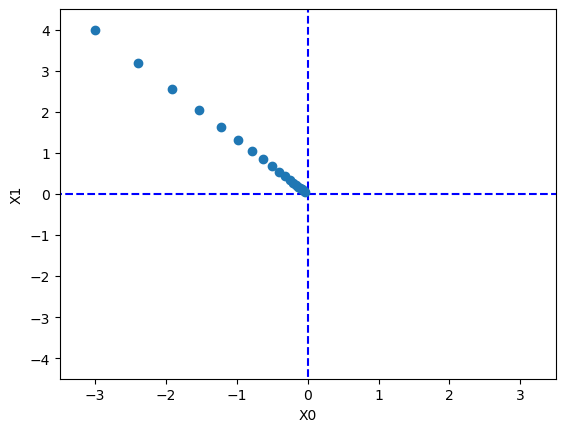

In [28]:
#갱신 과정을 그림으로 나타낸 것.

import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [39]:
#학습률을 변경한 두 예시

def gradient_descent(f, init_x, lr=0.01, step_num=100):     #f는 최적화하려는 함수, init_x는 초깃값, lr은 학습률, step_num은 경사법에 따른 반복 횟수
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)                     #함수 기울기
        x -= lr * grad
    return x

def function_2(x):
    return x[0]**2 + x[1]**2 


#학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
a = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)       #너무 큰 값으로 발산
print(a)


#학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
b = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)       #거의 갱신되지 않은 채 끝남
print(b)


[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [80]:
#신경망에서의 기울기
#이때 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.

#간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드 구현

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from function import softmax, cross_entropy_error
from gradient_2d import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)            #함수 정의
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.30024443  0.20157184 -0.50181627]
 [ 0.45036664  0.30235776 -0.7527244 ]]


In [87]:
#학습 알고리즘 구현
#신경망 학습의 구현 순서 : 1. 미니배치 2. 기울기 산출 3. 매개변수 갱신 4. 반복
#경사 하강법을 매개변수를 갱신하는 방법이며, 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법이라고 부른다.(SGD)

#손글씨 숫자를 학습하는 신경망 구현

#2층 신경망을 하나의 클래스로 구현하는 것부터 시작 (TwoLayerNet.py)


#1.미니배치 학습 구현
#미니배치 학습 : 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수 갱신

import numpy as np
from datasets.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

#하이퍼파라미터 
iters_num = 10000   #반복 횟수
train_size = x_train.shape[0]
batch_size = 100    #미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    #매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)




KeyboardInterrupt: 

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.7854666666666666, 0.7895
train acc, test acc | 0.8803333333333333, 0.8858
train acc, test acc | 0.8992833333333333, 0.9024
train acc, test acc | 0.9091666666666667, 0.9116
train acc, test acc | 0.9155666666666666, 0.9179
train acc, test acc | 0.9212333333333333, 0.9221
train acc, test acc | 0.92605, 0.9272
train acc, test acc | 0.9291333333333334, 0.93
train acc, test acc | 0.9321166666666667, 0.9335
train acc, test acc | 0.93495, 0.936
train acc, test acc | 0.9382833333333334, 0.9394
train acc, test acc | 0.9411333333333334, 0.9412
train acc, test acc | 0.9431166666666667, 0.9434
train acc, test acc | 0.9444833333333333, 0.9451
train acc, test acc | 0.94655, 0.9455
train acc, test acc | 0.9481333333333334, 0.9478


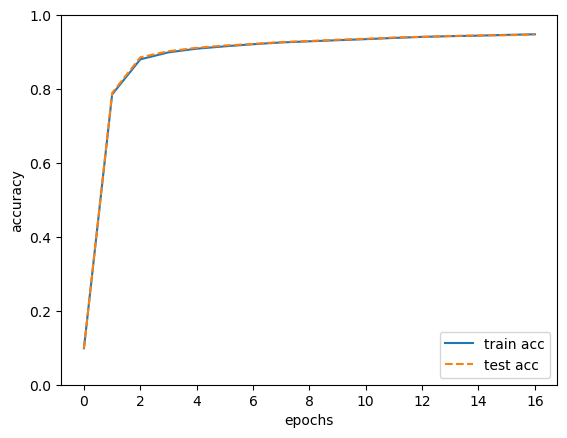

In [86]:
#시험 데이터로 평가하기
#학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록, 1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도 기록
#에폭은 단위. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당, 예를 들어 훈련 데이터 10000개를 100개의 미니배치로 학습할 경우, 
#확률적 경사 하강법을 100회 반복하면 모두 '소진'한 게 된다. 이 경우 100회가 1에폭이 된다.

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [4]:
#오차역전파법 (가중치 매개변수의 기울기를 효율적으로 계산하는 방법)

#계산 그래프로 해석
#계산 과정을 그래프로 나타낸 것, 노드와 에지로 표현
#문제풀이 흐름 : 1. 계산 그래프 구성, 2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행.(순전파)

#국소적 계산 : 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다.
#계산 그래프는 국소적 계산에 집중.

#계산 그래프로 푸는 이유 : 국소적 계산의 이점, 중간 계산 결과를 모두 보관 가능
#가장 큰 이유는 역전파를 통해 '미분'을 효율적으로 계산할 수 있다.

#연쇄법칙에 따라 계산 그래프의 역전파가 진행된다.

#역전파
#덧셈 노드의 역전파 : 입력 값을 그대로 흘려보낸다.
#곱셈 노드의 역전파 : 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보낸다.

#단순한 계층 구현
#곱셈 계층, forward()는 순전파, backward()는 역전파

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out
    
    def backward(self, dout):
        dx = dout * self.y  #x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy
    
apple = 100
apple_num = 2
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) #220

#역전파(호출 순서가 반대)
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)  #2.2 110 200




#덧셈 계층

class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy
    
apple = 100
apple_num = 2
orange = 50
orange_num = 3
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num) #1
orange_price = mul_orange_layer.forward(orange, orange_num) #2
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #3
price = mul_tax_layer.forward(all_price, tax) #4

#역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #4
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #3
dorange, dorange_num  = mul_orange_layer.backward(dorange_price) #2
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #1

print(price) #715
print(dapple_num, dapple, dorange, dorange_num, dtax) # 110 2.2 3.3 165 650_




220.00000000000003
2.2 110.00000000000001 200
385.00000000000006
110.00000000000001 2.2 3.3000000000000003 55.00000000000001 350


In [ ]:
#활성화 함수 계층 구현

#ReLU 계층 (입력이 0보다 크면 역전파가 상류에서 하류로 흘리고 이하면 하류로 신호를 보내지 않음)

class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx
    
#Sigmoid 계층 (역전파는 순전파의 출력만으로 계산할 수 있다.)

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx
    
#Affine 계층 (신경망의 순전파 때 수행하는 행렬의 내적은 기하학에서는 어파인 변환이라고 함)

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)

        return dx
    
#softmax-with-loss 계층
#softmax 계층은 입력 값을 정규화하여 출력함
#손실 함수로 교차 엔트로피 오차 포함.

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None #손실
        self.y = None    #softmax의 출력
        self.t = None    #정답 레이블 (원-핫 벡터)
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout = 1):           #역전파 때는 전파하는 값을 배치의 수(batch_size)로 나눠서 데이터 1개당 오차를 앞 계층으로 전파하는 점에 주의.
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx
    

#오차역전파법을 적용한 신경망 구현
#신경망 학습의 전체 그림 : 1. 미니배치, 2.기울기 산출(오차역전파법 등장), 3.매개변수 갱신, 4. 반복

import sys, os
sys.path.append(os.pardir)
import numpy as np
from layers import *
from gradient_2d import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        #계층 생성
        self.layers = OrderedDict()             #순서가 있는 딕셔너리 => 딕셔너리에 추가한 순서를 기억한다는 것
        self.layers['Affine1'] = \
            Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = \
            Affine(self.params['W2'], self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return X
    
    #x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    #x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        #순전파
        self.loss(x, t)

        #역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        #결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads
    



In [6]:
#오차역전파법으로 구한 기울기 검증하기 (수치 미분의 결과와 오차역전파법의 결과를 비교하여 제대로 구현했는지 검증)

import sys, os
sys.path.append(os.pardir)
import numpy as np
from datasets.mnist import load_mnist
from two_layer_net import TwoLayerNet

#데이터 읽기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

#각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))


W1:2.089600177913977e-10
b1:1.030647116558427e-09
W2:6.6647739881881e-08
b2:1.3330177953407852e-07


In [7]:
#오차역전파법을 사용한 학습 구현하기

import sys, os
sys.path.append(os.pardir)
import numpy as np
from datasets.mnist import load_mnist
from two_layer_net import TwoLayerNet

#데이터 읽기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #오차역전파법으로 기울기를 구한다.
    grad = network.gradient(x_batch, t_batch)

    #갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.10218333333333333 0.101
0.7975666666666666 0.8014
0.87875 0.8821
0.8991166666666667 0.9006
0.9084166666666667 0.9093
0.9149166666666667 0.9159
0.9191666666666667 0.92
0.9227666666666666 0.9246
0.9267833333333333 0.9277
0.9310333333333334 0.9308
0.9336833333333333 0.9339
0.9364 0.9364
0.93895 0.9385
0.9415 0.9404
0.9431166666666667 0.9421
0.9445166666666667 0.9437
0.9465333333333333 0.9444


In [ ]:
#학습 관련 기술들

#가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값, 하이퍼파라미터 설정 방법
#오버피팅의 대응책인 가중치 감소와 드롭아웃 등의 정규화 방법, 배치 정규화

#매개변수 갱신
#신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것 => 매개변수의 최적값을 찾는 문제이며 이 문제를 푸는 것을 최적화라고 함.

#SGD(확률적 경사 하강법)은 단순하지만 더 좋은 방법도 있다.
#SGD 복습

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]


#의사코드

network = TwoLayerNet(...)
optimizer = SGD()           #'최적화를 행하는 자' , 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈하하기 좋다.

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

#SGD의 단점 => 비등방성 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임.
#개선해주는 방법 => 모멘텀, AdaGrad, Adam



In [ ]:
#학습 관련 기술들

#모멘텀
#공이 그릇의 바닥을 구르는 듯한 움직임을 보여준다.

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None                   #v가 물체의 속도, 초기화 때는 아무 값도 담지 않는다.
    
    def update(self, params, grads):    #처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장.
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [ ]:
#학습 관련 기술들

#AdaGrad
#신경망 학습에서는 학습률 값이 중요, 이 학습률을 정하는 효과적 기술 => 학습률 감소
#학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것 => 이를 발전시키는 것이 AdaGrad ('각각의' 매개변수에 '맞춤형'값을 만들어줌)
#개별 매개변수에 적응적으로 학습률을 조정하며 학습을 진행, 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨.

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr *grads[key] / (np.sqrt(self.h[key]) + 1e-7)

#최솟값을 향해 효율적으로 움직이는 것을 알 수 있다. y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듬.    

In [ ]:
#학습 관련 기술들

#Adam
#위 두 기술을 융합한 것이 Adam 기법
#하이퍼파라미터의 '편향 보정'이 진행된다

class Adam:


    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


#모멘텀과 비슷한 패턴인데, 그때보다 공의 좌우 흔들림이 적다. => 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택
#Adam은 하이퍼파라미터를 3개 설정 => 1. 지금까지의 학습률, 2. 일차 모멘텀용 계수, 3. 이차 모멘텀용 계수


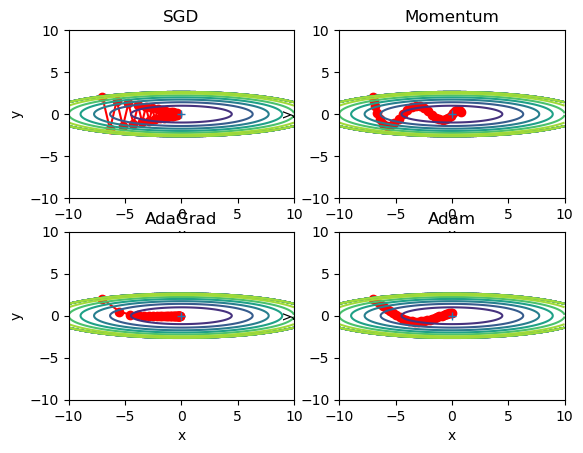

In [8]:
#4개의 기법 결과 비교

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

#풀어야 할 문제가 무엇이냐에 따라 달라지므로 선택 시 주의해야함.

==========iteration0==========
SGD:2.396462818580927
Momentum:2.26523701728976
AdaGrad:2.2488068250126836
Adam:2.1875392270842617
==========iteration100==========
SGD:1.692470410762643
Momentum:0.36319502004870635
AdaGrad:0.1336045467082566
Adam:0.22712249865137885
==========iteration200==========
SGD:0.8114294586075155
Momentum:0.2789500992138567
AdaGrad:0.11704715595598657
Adam:0.15368819193987618
==========iteration300==========
SGD:0.5643892492875549
Momentum:0.3092045597827955
AdaGrad:0.09397611947212581
Adam:0.20020196518525815
==========iteration400==========
SGD:0.5222568566651126
Momentum:0.23382181845311076
AdaGrad:0.12010616903172858
Adam:0.12550310869381204
==========iteration500==========
SGD:0.3109152721477678
Momentum:0.0589074509142502
AdaGrad:0.0273005932911917
Adam:0.03463564592836675
==========iteration600==========
SGD:0.3061785044434179
Momentum:0.17328682876756102
AdaGrad:0.05923543648434914
Adam:0.11655844009428876
==========iteration700==========
SGD:0.337165470

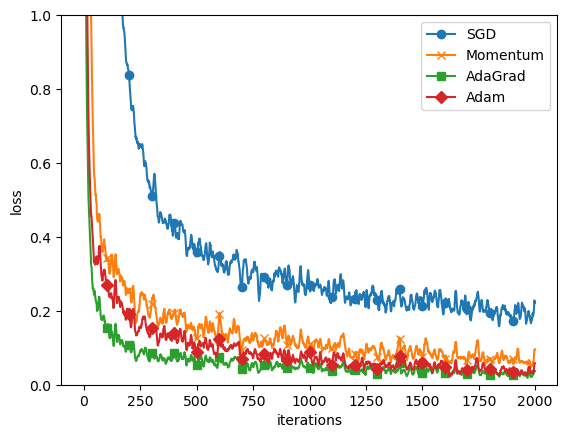

In [20]:
#MNIST 데이터셋으로 본 갱신 방법 비교

import sys,os
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import *

#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


#실험용 설정
optimizer = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()


networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


#훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("==========" + "iteration" + str(i) + "==========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


#그래프 그리기 
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


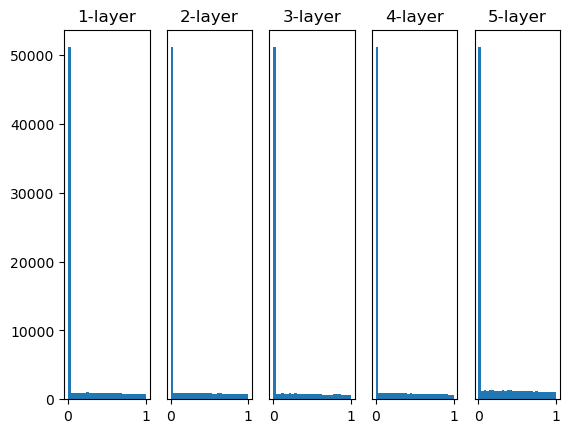

In [36]:
#신경망 학습에서 특히 중요한 것은 가중치의 초깃값
#가중치 감소 : 오비피팅을 억제해 범용 성능을 높이는 테크닉, 간단히 말하면 가중치 매개변수의 값이 작아지도록 학습하는 방법.
#가중치의 초깃값을 모두 0으로 설정한다면? => 나쁜 아이디어, 학습이 올바르게 이루어지지 않는다.
#0으로 하면 안 되는 이유 => 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다.
#가중치의 대칭적인 구조를 무너뜨리려면 초깃값을 무작위로 설정해야 함.

#은닉층의 활성화값의 분포를 관찰하면 중요한 정보를 얻을 수 있다.
#가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 간단한 구현 (시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘려 각 층의 활성화값 분포를 히스토그램으로 본다)

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000,100)  #1000개의 데이터
node_num = 100      #각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5   #은닉층이 5개
activaions = {}     #이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activaions[i-1]

    #초깃값을 다양하게 바꿔가며 실험
    #w = np.random.randn(node_num, node_num) * 1                             #표준편차가 1인 정규분포 이용
    #w = np.random.randn(node_num, node_num) * 0.01                          #표준편차가 0.01인 정규푼포 이용
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)       #Xavier 초깃값 이용
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)        #He 초깃값 이용

    a = np.dot(x, w)

    #활성화 함수도 바꿔가며 실험
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activaions[i] = z


#히스토그램
for i, a in activaions.items():
    plt.subplot(1, len(activaions), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    #plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()


#표준편차 1 : 시그모이드 함수는 그 출력이 0 또는 1에 가까워지자 미분이 0에 다가간다. => 데이터가 0,1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라짐. => 기울기 소실 문제
#표준편차 0.01 : 0.5부근에 집중, 기울기 소실 문제 없음 / 하지만 활성화값이 치우쳤다는 것 => 다수의 뉴런이 거의 같은 값을 출력하니 여러 개 둔 의미가 없다 (표현력 제한)
#Xavier 초깃값 : 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐, 앞의 방식보다는 넓게 분포됨 (일그러짐은 tanh 함수를 이용하면 개선), 활성화 함수가 선형인 것을 전제
#ReLU 이용 : He 초깃값 => 앞 계층의 노드가 n개일 때, 표준편차가 sqrt(2/n)인 정규분포를 사용, ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요


==========iteration:0==========
std=0.01:2.3025153779824645
Xavier:2.308301353177159
He:2.3806472310769307
==========iteration:100==========
std=0.01:2.3025879162091014
Xavier:2.2604858428005743
He:1.5827796003508665
==========iteration:200==========
std=0.01:2.3015256905915944
Xavier:2.086956511523545
He:0.8165507151053779
==========iteration:300==========
std=0.01:2.3031070394694657
Xavier:1.9938842266165593
He:0.5461078752963107
==========iteration:400==========
std=0.01:2.3004178325931575
Xavier:1.7443382801285137
He:0.5226125398942876
==========iteration:500==========
std=0.01:2.304090479672244
Xavier:1.2782230876865017
He:0.39985865578398844
==========iteration:600==========
std=0.01:2.302380959969412
Xavier:0.9528822708700566
He:0.3995184636262835
==========iteration:700==========
std=0.01:2.301828754286774
Xavier:0.6394418530107608
He:0.2477017470029017
==========iteration:800==========
std=0.01:2.299997264809678
Xavier:0.5176219926704863
He:0.321674476205789
==========iteratio

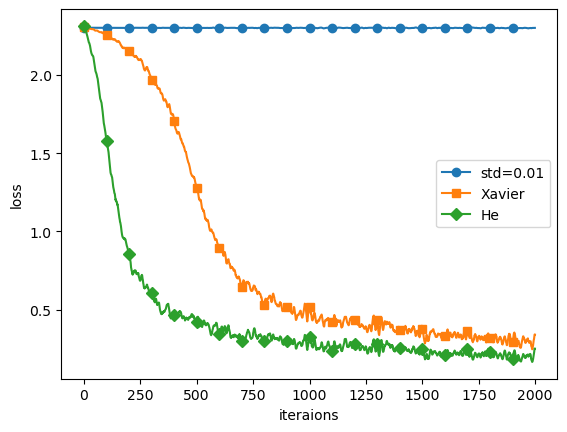

In [37]:
#MNIST 데이터셋으로 본 가중치 초깃값 비교

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import SGD

#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

#실험용 설정
weight_init_types = {'std=0.01':0.01, 'Xavier':'sigmoid', 'He':'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

#훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("==========" + "iteration:" + str(i) + "==========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


#그래프 그리기
markers = {'std=0.01':'o', 'Xavier':'s', 'He':'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iteraions")
plt.ylabel("loss")
plt.legend()
plt.show()

#활성화 함수 : ReLU 사용, 학습 진도는 He 초깃값 쪽이 더 빠르다

============== 1/16 ==============
epoch:0 | 0.099 - 0.09
epoch:1 | 0.097 - 0.086
epoch:2 | 0.097 - 0.131
epoch:3 | 0.097 - 0.155
epoch:4 | 0.097 - 0.179
epoch:5 | 0.097 - 0.191
epoch:6 | 0.097 - 0.203
epoch:7 | 0.097 - 0.226
epoch:8 | 0.097 - 0.238
epoch:9 | 0.097 - 0.262
epoch:10 | 0.097 - 0.269
epoch:11 | 0.097 - 0.286
epoch:12 | 0.097 - 0.309
epoch:13 | 0.097 - 0.314
epoch:14 | 0.097 - 0.326
epoch:15 | 0.097 - 0.35
epoch:16 | 0.097 - 0.355
epoch:17 | 0.097 - 0.371
epoch:18 | 0.097 - 0.381


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.394
============== 2/16 ==============
epoch:0 | 0.116 - 0.087
epoch:1 | 0.097 - 0.094
epoch:2 | 0.097 - 0.122
epoch:3 | 0.097 - 0.141
epoch:4 | 0.097 - 0.165
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.23
epoch:7 | 0.097 - 0.253
epoch:8 | 0.097 - 0.283
epoch:9 | 0.097 - 0.305
epoch:10 | 0.097 - 0.332
epoch:11 | 0.097 - 0.353
epoch:12 | 0.097 - 0.383
epoch:13 | 0.097 - 0.394
epoch:14 | 0.097 - 0.406
epoch:15 | 0.097 - 0.429
epoch:16 | 0.097 - 0.449
epoch:17 | 0.097 - 0.463
epoch:18 | 0.097 - 0.471


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.49
============== 3/16 ==============
epoch:0 | 0.108 - 0.12
epoch:1 | 0.302 - 0.106
epoch:2 | 0.442 - 0.155
epoch:3 | 0.571 - 0.204
epoch:4 | 0.655 - 0.241
epoch:5 | 0.723 - 0.274
epoch:6 | 0.777 - 0.311
epoch:7 | 0.834 - 0.349
epoch:8 | 0.873 - 0.38
epoch:9 | 0.888 - 0.423
epoch:10 | 0.915 - 0.461
epoch:11 | 0.934 - 0.481
epoch:12 | 0.943 - 0.519
epoch:13 | 0.949 - 0.533
epoch:14 | 0.961 - 0.554
epoch:15 | 0.966 - 0.581
epoch:16 | 0.977 - 0.595
epoch:17 | 0.983 - 0.611
epoch:18 | 0.989 - 0.622


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.99 - 0.637
============== 4/16 ==============
epoch:0 | 0.07 - 0.082
epoch:1 | 0.166 - 0.114
epoch:2 | 0.299 - 0.183
epoch:3 | 0.379 - 0.254
epoch:4 | 0.473 - 0.313
epoch:5 | 0.533 - 0.374
epoch:6 | 0.596 - 0.433
epoch:7 | 0.629 - 0.486
epoch:8 | 0.657 - 0.53
epoch:9 | 0.705 - 0.578
epoch:10 | 0.723 - 0.612
epoch:11 | 0.748 - 0.652
epoch:12 | 0.773 - 0.67
epoch:13 | 0.787 - 0.698
epoch:14 | 0.809 - 0.72
epoch:15 | 0.807 - 0.742
epoch:16 | 0.826 - 0.751
epoch:17 | 0.844 - 0.764
epoch:18 | 0.848 - 0.765


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.862 - 0.784
============== 5/16 ==============
epoch:0 | 0.098 - 0.088
epoch:1 | 0.105 - 0.106
epoch:2 | 0.11 - 0.226
epoch:3 | 0.117 - 0.375
epoch:4 | 0.111 - 0.499
epoch:5 | 0.117 - 0.573
epoch:6 | 0.124 - 0.634
epoch:7 | 0.132 - 0.693
epoch:8 | 0.147 - 0.724
epoch:9 | 0.154 - 0.765
epoch:10 | 0.158 - 0.789
epoch:11 | 0.164 - 0.81
epoch:12 | 0.171 - 0.829
epoch:13 | 0.169 - 0.848
epoch:14 | 0.177 - 0.856
epoch:15 | 0.181 - 0.873
epoch:16 | 0.186 - 0.875
epoch:17 | 0.189 - 0.883
epoch:18 | 0.196 - 0.896


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.193 - 0.898
============== 6/16 ==============
epoch:0 | 0.115 - 0.102
epoch:1 | 0.1 - 0.224
epoch:2 | 0.117 - 0.492
epoch:3 | 0.123 - 0.629
epoch:4 | 0.128 - 0.691
epoch:5 | 0.119 - 0.75
epoch:6 | 0.112 - 0.787
epoch:7 | 0.135 - 0.825
epoch:8 | 0.117 - 0.839
epoch:9 | 0.117 - 0.859
epoch:10 | 0.117 - 0.868
epoch:11 | 0.117 - 0.871
epoch:12 | 0.117 - 0.886
epoch:13 | 0.117 - 0.898
epoch:14 | 0.117 - 0.917
epoch:15 | 0.117 - 0.92
epoch:16 | 0.117 - 0.931
epoch:17 | 0.117 - 0.939


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.944
epoch:19 | 0.117 - 0.953
============== 7/16 ==============
epoch:0 | 0.092 - 0.085
epoch:1 | 0.117 - 0.209
epoch:2 | 0.118 - 0.487
epoch:3 | 0.117 - 0.65
epoch:4 | 0.117 - 0.722
epoch:5 | 0.117 - 0.766
epoch:6 | 0.117 - 0.801
epoch:7 | 0.117 - 0.833
epoch:8 | 0.117 - 0.856
epoch:9 | 0.117 - 0.881
epoch:10 | 0.116 - 0.907
epoch:11 | 0.116 - 0.931
epoch:12 | 0.116 - 0.942
epoch:13 | 0.116 - 0.951
epoch:14 | 0.116 - 0.96
epoch:15 | 0.116 - 0.971
epoch:16 | 0.116 - 0.976
epoch:17 | 0.116 - 0.978


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.982
epoch:19 | 0.117 - 0.989
============== 8/16 ==============
epoch:0 | 0.099 - 0.145
epoch:1 | 0.117 - 0.299
epoch:2 | 0.117 - 0.571
epoch:3 | 0.117 - 0.761
epoch:4 | 0.117 - 0.827
epoch:5 | 0.117 - 0.864
epoch:6 | 0.117 - 0.901
epoch:7 | 0.117 - 0.93
epoch:8 | 0.117 - 0.949
epoch:9 | 0.117 - 0.969
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.092 - 0.159
epoch:1 | 0.117 - 0.525
epoch:2 | 0.117 - 0.753
epoch:3 | 0.117 - 0.845
epoch:4 | 0.117 - 0.891
epoch:5 | 0.116 - 0.936
epoch:6 | 0.116 - 0.965
epoch:7 | 0.116 - 0.978
epoch:8 | 0.117 - 0.987
epoch:9 | 0.117 - 0.994
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.998
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.097 - 0.163
epoch:1 | 0.099 - 0.592
epoch:2 | 0.116 - 0.81
epoch:3 | 0.116 - 0.841
epoch:4 | 0.116 - 0.842
epoch:5 | 0.116 - 0.858
epoch:6 | 0.116 - 0.891
epoch:7 | 0.116 - 0.89
epoch:8 | 0.116 - 0.895
epoch:9 | 0.116 - 0.848
epoch:10 | 0.117 - 0.899
epoch:11 | 0.117 - 0.961
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.98
epoch:14 | 0.117 - 0.992
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.117 - 0.143
epoch:1 | 0.117 - 0.655
epoch:2 | 0.117 - 0.715
epoch:3 | 0.117 - 0.737
epoch:4 | 0.117 - 0.803
epoch:5 | 0.117 - 0.813
epoch:6 | 0.117 - 0.879
epoch:7 | 0.117 - 0.934
epoch:8 | 0.117 - 0.978
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.988
epoch:12 | 0.117 - 0.987
epoch:13 | 0.117 - 0.883
epoch:14 | 0.117 - 0.978
epoch:15 | 0.117 - 0.988
epoch:16 | 0.117 - 0.99
epoch:17 | 0.117 - 0.992
epoch:18 | 0.117 - 0.993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.994
============== 12/16 ==============
epoch:0 | 0.105 - 0.223
epoch:1 | 0.116 - 0.504
epoch:2 | 0.116 - 0.522
epoch:3 | 0.116 - 0.663
epoch:4 | 0.116 - 0.696
epoch:5 | 0.117 - 0.606
epoch:6 | 0.117 - 0.701
epoch:7 | 0.116 - 0.773
epoch:8 | 0.116 - 0.772
epoch:9 | 0.117 - 0.754
epoch:10 | 0.117 - 0.786
epoch:11 | 0.117 - 0.775
epoch:12 | 0.117 - 0.759
epoch:13 | 0.117 - 0.772
epoch:14 | 0.117 - 0.763
epoch:15 | 0.117 - 0.748
epoch:16 | 0.117 - 0.745
epoch:17 | 0.117 - 0.75
epoch:18 | 0.117 - 0.774


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.792
============== 13/16 ==============
epoch:0 | 0.097 - 0.103
epoch:1 | 0.117 - 0.501
epoch:2 | 0.117 - 0.539
epoch:3 | 0.117 - 0.566
epoch:4 | 0.117 - 0.605
epoch:5 | 0.117 - 0.656
epoch:6 | 0.117 - 0.527
epoch:7 | 0.117 - 0.685
epoch:8 | 0.117 - 0.682
epoch:9 | 0.117 - 0.704
epoch:10 | 0.117 - 0.706
epoch:11 | 0.117 - 0.705
epoch:12 | 0.117 - 0.711
epoch:13 | 0.117 - 0.712
epoch:14 | 0.117 - 0.71
epoch:15 | 0.117 - 0.712
epoch:16 | 0.117 - 0.712
epoch:17 | 0.117 - 0.713
epoch:18 | 0.117 - 0.713


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.712
============== 14/16 ==============
epoch:0 | 0.1 - 0.097
epoch:1 | 0.1 - 0.335
epoch:2 | 0.116 - 0.402
epoch:3 | 0.117 - 0.472
epoch:4 | 0.116 - 0.471
epoch:5 | 0.117 - 0.48
epoch:6 | 0.117 - 0.502
epoch:7 | 0.117 - 0.518
epoch:8 | 0.117 - 0.55
epoch:9 | 0.117 - 0.574
epoch:10 | 0.116 - 0.57
epoch:11 | 0.117 - 0.591
epoch:12 | 0.117 - 0.588
epoch:13 | 0.117 - 0.585
epoch:14 | 0.117 - 0.65
epoch:15 | 0.117 - 0.695
epoch:16 | 0.116 - 0.711
epoch:17 | 0.117 - 0.698
epoch:18 | 0.117 - 0.702


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.684
============== 15/16 ==============
epoch:0 | 0.116 - 0.088
epoch:1 | 0.116 - 0.147
epoch:2 | 0.116 - 0.188
epoch:3 | 0.116 - 0.47
epoch:4 | 0.116 - 0.472
epoch:5 | 0.116 - 0.487
epoch:6 | 0.116 - 0.434
epoch:7 | 0.116 - 0.591
epoch:8 | 0.116 - 0.605
epoch:9 | 0.116 - 0.601
epoch:10 | 0.116 - 0.601
epoch:11 | 0.116 - 0.587
epoch:12 | 0.116 - 0.603
epoch:13 | 0.116 - 0.604
epoch:14 | 0.116 - 0.604
epoch:15 | 0.116 - 0.605
epoch:16 | 0.116 - 0.602
epoch:17 | 0.116 - 0.606
epoch:18 | 0.116 - 0.606


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.608
============== 16/16 ==============
epoch:0 | 0.087 - 0.111
epoch:1 | 0.099 - 0.231
epoch:2 | 0.116 - 0.409
epoch:3 | 0.105 - 0.409
epoch:4 | 0.105 - 0.408
epoch:5 | 0.105 - 0.418
epoch:6 | 0.117 - 0.424
epoch:7 | 0.117 - 0.429
epoch:8 | 0.117 - 0.428
epoch:9 | 0.117 - 0.435
epoch:10 | 0.117 - 0.501
epoch:11 | 0.117 - 0.518
epoch:12 | 0.117 - 0.517
epoch:13 | 0.117 - 0.514
epoch:14 | 0.117 - 0.52
epoch:15 | 0.117 - 0.527
epoch:16 | 0.117 - 0.527
epoch:17 | 0.117 - 0.527
epoch:18 | 0.117 - 0.548
epoch:19 | 0.117 - 0.523


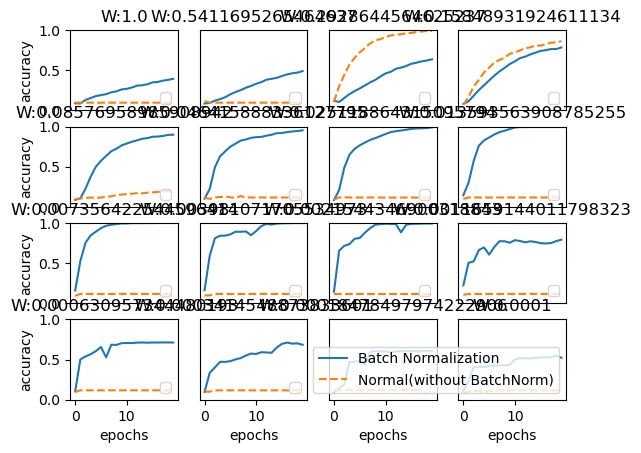

In [5]:
#배치 정규화 (각 층이 활성화를 적당히 퍼뜨리도록 '강제'해본다)
#주목받는 이유 : 1.학습 속도 개선, 2.초깃값에 크게 의존하지 않는다, 3.오버피팅을 억제(드롭아웃 등의 필요성 감소)
#미니배치를 단위로 정규화한다. 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화
#배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행

#배치 정규화 계층을 사용한 실험 (MNIST 데이터셋을 사용)

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from multi_layer_net_extend import MultiLayerNetExtend
from optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


#그래프 그리기
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()
    

거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타남.
배치 정규화를 이용하지 않는 경우엔 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습도 보임

epoch:0, train acc:0.14666666666666667, test acc:0.1388
epoch:1, train acc:0.15333333333333332, test acc:0.1446
epoch:2, train acc:0.16666666666666666, test acc:0.1427
epoch:3, train acc:0.19333333333333333, test acc:0.1589
epoch:4, train acc:0.19, test acc:0.1593
epoch:5, train acc:0.24333333333333335, test acc:0.1874
epoch:6, train acc:0.25666666666666665, test acc:0.203
epoch:7, train acc:0.31333333333333335, test acc:0.2395
epoch:8, train acc:0.33, test acc:0.2621
epoch:9, train acc:0.3566666666666667, test acc:0.2756
epoch:10, train acc:0.38, test acc:0.288
epoch:11, train acc:0.38, test acc:0.3012
epoch:12, train acc:0.4166666666666667, test acc:0.3216
epoch:13, train acc:0.43, test acc:0.3374
epoch:14, train acc:0.43666666666666665, test acc:0.3314
epoch:15, train acc:0.44666666666666666, test acc:0.3474
epoch:16, train acc:0.4633333333333333, test acc:0.3536
epoch:17, train acc:0.47, test acc:0.356
epoch:18, train acc:0.48333333333333334, test acc:0.3751
epoch:19, train acc:0.5

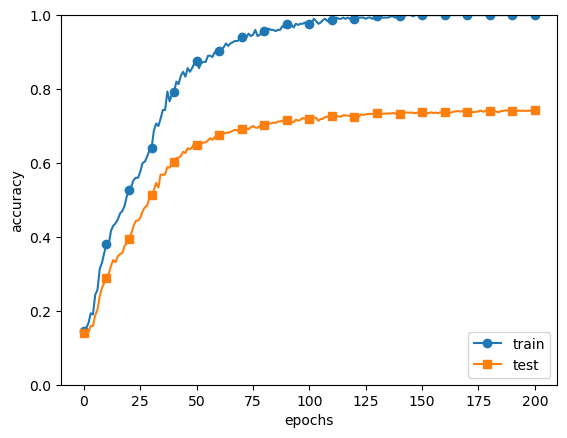

In [8]:
#오버피팅 : 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태를 말함.
#일어나는 경우 : 1.매개변수가 많고 표현력이 높은 모델, 2.훈련 데이터가 적음

#위 두 경우를 충족하여 오버피팅 발생 유도(MNIST 데이터셋 300개, 7층 네트워크, 각 층 뉴런 100개, 활성화 함수 ReLU)

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

#weight decay (가중치 감쇠) 설정
weight_decay_lambda = 0 #사용하지 않을 경우
#weight_decay_lambda = 0.1

#========================================================
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)    #학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


#그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터를 사용하여 측정한 정확도는 거의 100%이다. 그러나 시험 데이터는 큰 차이를 보임.
이처럼 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응해버린 결과이다.

epoch:0, train acc:0.06333333333333334, test acc:0.0896
epoch:1, train acc:0.08, test acc:0.095
epoch:2, train acc:0.11333333333333333, test acc:0.0982
epoch:3, train acc:0.12666666666666668, test acc:0.1051
epoch:4, train acc:0.15, test acc:0.116
epoch:5, train acc:0.15, test acc:0.1238
epoch:6, train acc:0.18, test acc:0.1342
epoch:7, train acc:0.2, test acc:0.1434
epoch:8, train acc:0.23666666666666666, test acc:0.1642
epoch:9, train acc:0.27666666666666667, test acc:0.1774
epoch:10, train acc:0.3333333333333333, test acc:0.2106
epoch:11, train acc:0.4, test acc:0.2454
epoch:12, train acc:0.4266666666666667, test acc:0.2637
epoch:13, train acc:0.44666666666666666, test acc:0.2792
epoch:14, train acc:0.49, test acc:0.3086
epoch:15, train acc:0.48, test acc:0.3128
epoch:16, train acc:0.5133333333333333, test acc:0.3401
epoch:17, train acc:0.5533333333333333, test acc:0.3673
epoch:18, train acc:0.5866666666666667, test acc:0.3822
epoch:19, train acc:0.5733333333333334, test acc:0.3776


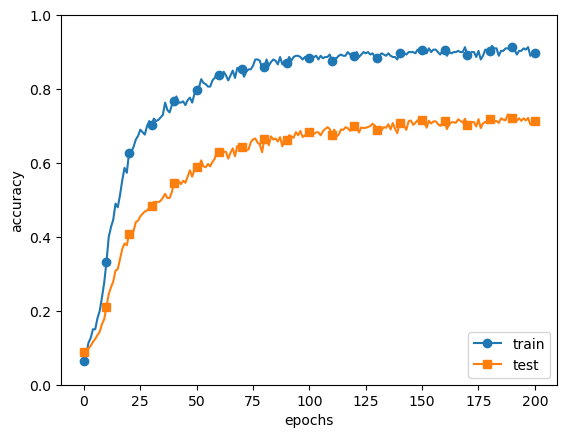

In [9]:
#오버피팅 억제용 예시 방법 => 가중치 감소 : 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과
#예시 : 가중치의 제곱 노름(L2 노름)을 손실 함수에 더한다. 가중치를 W라 하면 L2 노름에 따른 가중치 감소는 (람다W^2)/2 가 되고 이 값을 손실 함수에 더한다.
#여기서 람다는 정규화의 세기를 조절하는 하이퍼파라미터이다. 람다를 크게 설정할수록 큰 가중치에 대한 페널티가 커진다.
#따라서 가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정규화 항을 미분한 람다W를 더한다.

#실험 구현 (람다 = 0.1)

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

#weight decay (가중치 감쇠) 설정
#weight_decay_lambda = 0 #사용하지 않을 경우
weight_decay_lambda = 0.1

#========================================================
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)    #학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


#그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

여전히 차이가 있지만, 가중치 감소를 이용하지 않은 그래프와 비교하면 그 차이가 줄었다.
다시 말해 오버피팅이 억제됐다는 소리. 하지만 훈련 데이터에 대한 정확도가 100%에 도달하지 못한 점도 주목.

In [ ]:
#드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법
#가중치 감소는 신경망 모델이 복잡해지면 가중치 감소로만 대응하기 어려워짐
#훈련 때 은닉층의 뉴런을 무작위로 골라 삭제, 삭제된 뉴런은 신호를 전달하지 않는다.
#훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택, 시험 때는 모든 뉴런에 신호를 전달, 단 시험 때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력.

#드롭아웃 구현
#순전파를 담당하는 forward 메서드에서는 훈련 때만 잘 계산해두면 시험 때는 단순히 데이터를 흘리기만 하면 된다. (삭제한 비율은 곱하지 않아도 좋다)(http://chainer.org/)

class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask
    

#핵심은 훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것
#self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정. 역전파 때 동작은 ReLU와 같다.
#즉, 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단. 

train loss:2.312034103857387
=== epoch:1, train acc:0.08, test acc:0.0712 ===
train loss:2.316042286199715
train loss:2.2991534445315365
train loss:2.314172239926195
=== epoch:2, train acc:0.08333333333333333, test acc:0.0718 ===
train loss:2.303354510613785
train loss:2.3114173276440595
train loss:2.308067938160063
=== epoch:3, train acc:0.09333333333333334, test acc:0.071 ===
train loss:2.3251265909956023
train loss:2.30141955734957
train loss:2.3100142299693243
=== epoch:4, train acc:0.08666666666666667, test acc:0.0712 ===
train loss:2.305457467642114
train loss:2.3003995454419144
train loss:2.300991988830882
=== epoch:5, train acc:0.1, test acc:0.0745 ===
train loss:2.2978864817781446
train loss:2.301631595422251
train loss:2.304988776253639
=== epoch:6, train acc:0.10333333333333333, test acc:0.0773 ===
train loss:2.3091453307645406
train loss:2.3103756776454465
train loss:2.302628665897007
=== epoch:7, train acc:0.11, test acc:0.0796 ===
train loss:2.2932101165660286
train loss:

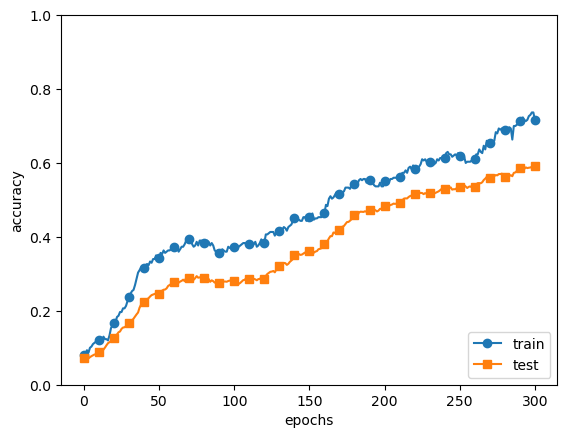

In [10]:
#MNIST 데이터셋으로 드롭아웃 효과 확인해보기

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from multi_layer_net_extend import MultiLayerNetExtend
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

#드롭아웃 사용 유무와 비율 설정
use_dropout = True  #드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2

#======================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list



#그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었다. 훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 되었다.
드롭아웃을 이용하면 표현력을 높이면서 오버피팅을 억제할 수 있다.

※앙상블 학습 : 개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식.
예를 들어, 같거나 비슷한 구조의 네트워크를 5개 준비해 따로따로 학습시키고, 시험때는 그 5개의 출력을 평균 내어 답하는 것.
드롭아웃과 밀접 : 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있고 추론 때는 뉴런의 출력에 삭제한 비율을 곱하면서 앙상블 학습에서와 같은 효과를 얻는다.
즉, 드롭아웃은 앙상블 학습과 같은 효과를 하나의 네트워크로 구현했다고 생각할 수 있다.

In [11]:
#적절한 하이퍼파라미터 값 찾기
#예시 : 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등
#값을 최대한 효율적을 탐색하는 방법

#1.검증 데이터
#하이퍼파라미터의 성능을 평가할 때는 시험 데이터를 사용해서는 안 된다. => 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문이다. (시험 데이터에만 적합하도록 조정되어 버림)
#조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요. => 검증 데이터라고 부른다.
#훈련 데이터 : 매개변수 학습, 검증 데이터 : 하이퍼파라미터 성능 평가, 시험 데이터 : 신경망의 범용 성능 평가

#MNIST 데이터셋에서 검증 데이터를 얻는 가장 간단한 방법은 훈련 데이터 중 20% 정도를 먼저 분리하는 것.
import sys,os
sys.path.append(os.pardir)
from util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

#훈련 데이터를 뒤섞는다
x_train, t_train = shuffle_dataset(x_train, t_train)

#20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]





AttributeError: 'numpy.ndarray' object has no attribute 'shpe'

val acc:0.12 | lr:1.6334121265227062e-06, weight decay:1.0676394587693153e-06
val acc:0.11 | lr:2.3063963680494445e-05, weight decay:3.0046646595965287e-05
val acc:0.24 | lr:0.00015993564553177134, weight decay:1.0926428358395597e-08
val acc:0.14 | lr:0.0004562827973552667, weight decay:5.754033906212218e-06
val acc:0.08 | lr:2.737381801758832e-05, weight decay:5.798882885944309e-08
val acc:0.62 | lr:0.006499529470181342, weight decay:2.805062290255196e-06
val acc:0.25 | lr:0.001692166773033101, weight decay:2.6846391540481918e-05
val acc:0.11 | lr:4.587785358412761e-05, weight decay:6.621259549865077e-06
val acc:0.14 | lr:5.2678966086598665e-05, weight decay:9.466300684453568e-05
val acc:0.04 | lr:2.003849650742472e-06, weight decay:3.365253825365685e-06
val acc:0.04 | lr:3.0553621846682294e-06, weight decay:2.1737861751610204e-08
val acc:0.08 | lr:3.849961876637013e-05, weight decay:5.194904149653428e-07
val acc:0.23 | lr:0.000347346395388517, weight decay:1.445369227398313e-05
val a

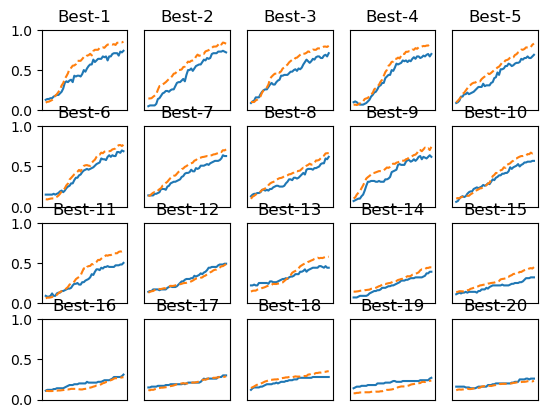

In [12]:
#2.하이퍼파라미터 최적화
#'최적 값'이 존재하는 범위를 조금씩 줄여간다는 것이 핵심 (무작위로 샘플링해 탐색하는 편이 좋은 결과를 낸다고 알려져 있음)
#범위는 '대략적으로' 지정하는 것이 효과적, 실제로도 10의 거듭제곱 단위로 지정한다. 이를 로그 스케일로 지정한다고 함.
#학습을 위한 에폭을 작게 하여, 1회 평가에 걸리는 시간을 단축하는 것이 효과적.
#정리 : 0단계.하이퍼파라미터 값의 범위를 설정, 1단계.설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출, 
#2단계.1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도 평가(에폭은 작게), 3단계.1단게와 2단계를 특정 횟수 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힘.

#MNIST 데이터셋을 사용해 하이퍼파라미터 최적화 (학습률, 가중치 감소의 세기를 조절하는 계수)
#로그 스케일 범위에서 무작위로 추출, 가중치 감소 계수 : 10^-8 ~ 10^-4, 학습률 : 10^-6 ~ 10^-2 부터 시작

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from multi_layer_net import MultiLayerNet
from util import shuffle_dataset
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


#하이퍼파라미터 무작위 탐색
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    #탐색한 하이퍼파라미터의 범위 지정
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    #==============================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list



# 그래프 그리기
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

Best-1~5 확인하는법
잘될 것 같은 값의 범위를 관찰하고 범위를 좁혀간다. 그런 다음 그 범위로 똑같은 작업 반복.
범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택.

In [13]:
#CNN (합성곱 신경망)
#CNN은 이미지 인식, 음성 인식 등 다양한 곳에서 사용. 특히, 이미지 인식 분야에서 거의 다 기초로 함.

#전체 구조
#convolutional layer(합성곱 계층), pooling layer(풀링 계층)
#지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있다. => 완전연결 , 완전히 연결된 계층을 Affine 계층이라는 이름으로 구현
#완전연결 신경망은 Affine 계층 뒤에 활성화 함수를 갖는 ReLU 계층이 이어진다. (Affine-ReLU)

#CNN 구조
#계층 : Conv-ReLU-(Pooling) 흐름 , 주목할 점은 출력에 가까운 층에서는 Affine-ReLU 구성을 사용할 수 있다는 것.
#CNN에서는 패딩, 스트라이드 등 고유 용어가 등장. 

#완전연결 계층의 문제점(완전연결 계층에서는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있다)
#'데이터의 형상이 무시'된다는 사실. 
#예시 : 입력 데이터가 이미지인 경우 => 이미지는 세로-가로-채널(색상)로 구성된 3차원 데이터이다. 그러나 완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화해줘야 한다.
#지금까지 MNIST 데이터셋을 사용한 사례에서는 형상이 (1, 28, 28)인 이미지를 1줄로 세운 784개의 데이터를 첫 Affine 계층에 입력.
#이미지는 3차원 형상이며, 이 형상에는 공간적 정보가 담겨 있다. 예를 들면 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나,
#거리가 먼 픽셀끼리는 별 연관이 없는 등, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어 있을 것이다.
#그러나 완전연결 계층은 이 형상들을 무시하고 모든 입력 데이터를 동등한 뉴런으로 취급하여 형상에 담긴 정보를 살릴 수 없다.

#합성곱 계층은 형상을 유지한다. 이미지도 3차원으로 입력받으며, 다음 계층에도 3차원 데이터로 전달한다. => 그래서 CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있다.
#CNN에서 합성곱 계층의 입출력 데이터를 특징 맵이라고도 한다. 입력 데이터를 입력 특징 맵, 출력 데이터를 출력 특징 맵이라고 하는 식


In [ ]:
#합성곱 연산 (이미지 처리에서 말하는 필터 연산)
#입력 데이터에 필터를 적용, 데이터와 필터의 형상을 (높이, 너비)로 표기하며, 문헌에 따라 필러를 커널이라 칭하기도 한다.
#필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용. 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구한다. (단일 곱셈-누산) 그리고 그 결과를 출력의 해당 장소에 저장
#완전연결 신경망에는 가중치 매개변수와 편향이 존재하는데, CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당.
#CNN에서도 편향이 존재한다. 필터를 적용한 후의 데이터에 더해지고 편향은 항상 1X1만 존재.

#패딩 : 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값으로 채우는 것
#패딩은 주로 출력 크기를 조정할 목적으로 사용한다. (출력 크기가 커진다)

#스트라이드(보폭) : 필터를 적용하는 위치의 간격
#스트라이드를 키우면 출력 크기는 작아진다.

#입력 크기 (H,W) , 필터 크기 (FH, FW) , 출력 크기 (OH, OW) , 패딩 P , 스트라이드 S 라고 했을 때 출력 크기 구하는 식
#OH = {(H+2P-FH)/S} + 1
#OW = {(W+2P-FW)/S} + 1
#정수로 나눠떨어지는 값이어야 한다는 점을 주의

#3차원 데이터의 합성곱 연산
#2차원 때와 달리 길이 방향(채널 방향)으로 특징 맵이 늘어남. 채널 쪽으로 특징 맵이 여러개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻는다.
#주의할 점 : 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다.
#블록으로 생각하기 => (채널C, 높이H, 너비W), 필터는 (C, FH, FW) 
#다수의 채널을 내보내려면 어떻게 해야 할까 => 필터(가중치)를 다수 사용한다.
#(C, H, W) ⊙ (FN, C, FH, FW) -> (FN, OH, OW) : 필터를 FN개 적용하면 출력 맵도 FN개가 생성
#이 완성된 블록을 다음 계층으로 넘기겠다는 것이 CNN의 처리 흐름
#필터의 수도 고려해야 한다. 그래서 필터의 가중치 데이터는 4차원 데이터이며 (출력 채널 수, 입력 채널 수, 높이, 너비) 순으로 쓴다.

#배치 처리
#각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장. (데이터 수, 채널 수, 높이, 너비) 순으로 저장.
#(N, C, H, W) ⊙ (FN, C, FH, FW) -> (N, FN, OH, OW) + (FN, 1, 1) -> (N, FN, OH, OW)
#데이터가 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다. 즉, N회 분의 처리를 한 번에 수행하는 것.


In [16]:
#풀링 계층 : 풀링은 세로,가로 방향의 공간을 줄이는 연산
#최대 풀링 : 최댓값을 구하는 연산으로, 영역에서 가장 큰 원소 하나를 꺼냄.
#풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통이다.
#특징 : 1.학습해야 할 매개변수가 없다, 2.채널 수가 변하지 않는다, 3.입력의 변화에 영향을 적게 받는다

#합성곱/풀링 계층 구현(트릭 활용 im2col)
#im2col : for 문 대신 사용할 함수, 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수
#3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바뀐다.
#실제로 필터 적용 영역이 겹치는 경우가 대부분이고 원래 블록의 원소 수보다 많아진다. => 메모리를 더 많이 소비하는 단점 존재
#하지만 컴퓨터는 큰 행렬을 묶어서 계산하는데 탁월
#im2col로 입력 데이터를 전개한 다음에는 합성곱 계층의 필터(가중치)를 1열로 전개, 두 행렬의 내적을 계산 => 츨력 결과는 2차원 행렬, CNN은 데이터를 4차원 배열로 저장하므로 2차원을 4차원으로 변형

#합성곱 계층 구현/im2col
#im2col(input_dat, filter_h, filter_w, stride=1, pad=0)
#input_data : (데이터 수, 채널 수, 높이, 너비)의 4차원 입력 데이터, filter_h : 높이, filter_w : 너비, stride : 스트라이드, pad : 패딩

import sys, os
sys.path.append(os.pardir)
from util import im2col

x1 = np.random.rand(1, 3, 7, 7)     #(데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)           #(9, 75)

x2 = np.random.rand(10, 3, 7, 7)    #데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)           #(90, 75)


#합성곱 계층 구현/Convolution 클래스

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad -FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad -FW) / self.stride)

        #중요 부분===========================================
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T    #필터 전개, -1로 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어준다.
        out = np.dot(col, col_W) + self.b
        #====================================================


        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)        #transpose : 다차원 배열의 축 순서를 바꿔준다 (인덱스 번호로)

        return out
    

#역전파를 구현할 때는 im2col을 역으로 처리해야함. (col2im 참고)
#구현은 (layer.py 참고)

(9, 75)
(90, 75)


In [ ]:
#풀링 계층 구현하기(im2col 사용)
#채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다르다.

class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        #전개
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        #최댓값
        out = np.max(col, axis=1)

        #성형
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

#단계 : 1.입력 데이터를 전개, 2.행별 최댓값을 구한다, 3.적절한 모양으로 성형
#풀링 계층 전체 구현은 layer.py 참고

In [ ]:
#손글씨 숫자를 인식하는 CNN 구현
#네트워크 : Conv-ReLU-Pooling-Affine-ReLu-Affine-Softmax

#초기화 때 받는 인수
#input_dim : 입력 데이터(채널수, 높이, 너비)의 차원
#conv_param : 합성곱 계층의 하이퍼파라미터(딕셔너리)
#딕셔너리의 키 : 필터 수, 필터 크기, 스트라이드, 패딩, 은닉층의 뉴런 수, 출력층의 뉴런 수, 초기화 때의 가중치 표준편차


#초기화 인수로 주어진 합성곱 계층의 하이퍼파라미터를 딕셔너리에서 꺼낸다. 그리고 합성곱 계층의 출력 크기를 계산
class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5,
                             'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
                            filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) *
                               (conv_output_size/2))
#==============================================================================================

#가중치 매개변수를 초기화하는 부분. 1번째 층의 합성곱 계층과 나머지 두 완전연결 계층의 가중치와 편향이 필요. 이들을 parmas 딕셔너리에 저장
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0],
                                            filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size,
                                            hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
#=====================================================================================================

#CNN을 구성하는 계층들을 생성.
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'],
                                        self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'],
                                        self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
#==========================================================================여기까지 초기화

#추론을 수행하는 predict 와 손실 함수 값을 구하는 loss
#predict는 초기화 때 layers에 추가한 계층을 맨 앞에서부터 차례로 forward 메서드를 호출하며 그 결과를 다음 계층에 전달
#loss는 predict의 결과를 인수로 마지막 층의 forward 메서드를 호출한다. 즉, 첫 계층부터 마지막 계층까지 forward를 처리
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)
#=================================================================

#오차역전파법으로 기울기를 구하는 구현
def gradient(self, x, t):
    #순전파
    self.loss(x, t)

    #역전파
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
        dout = layer.backward(dout)

    #결과 저장
    grads = {}
    grads['W1'] = self.layers['Conv1'].dW
    grads['b1'] = self.layers['Conv1'].db
    grads['W2'] = self.layers['Affine1'].dW
    grads['b2'] = self.layers['Affine1'].db
    grads['W3'] = self.layers['Affine2'].dW
    grads['b3'] = self.layers['Affine2'].db

    return grads
#============================================================

train loss:2.300092882699058
=== epoch:1, train acc:0.327, test acc:0.359 ===
train loss:2.2980844510664293
train loss:2.2955917126834016
train loss:2.2893144163847916
train loss:2.2827218053156098
train loss:2.277133948503183
train loss:2.262016297284833
train loss:2.24417587130509
train loss:2.2202996476256516
train loss:2.2122858833407624
train loss:2.1632204444489336
train loss:2.1129169659526887
train loss:2.0872108160651575
train loss:2.0414861914661167
train loss:2.0166101929828453
train loss:1.9488955800896637
train loss:1.8744547798781996
train loss:1.8282147672921483
train loss:1.7160069409995213
train loss:1.6947319720911591
train loss:1.5504018223319667
train loss:1.5158369090366912
train loss:1.3487070022315815
train loss:1.3361340502692243
train loss:1.2792987230662556
train loss:1.0935797014580855
train loss:1.0024534984287785
train loss:0.98240293902869
train loss:0.9892927845723584
train loss:0.8985724719826078
train loss:0.8827957920057854
train loss:0.704675587279108

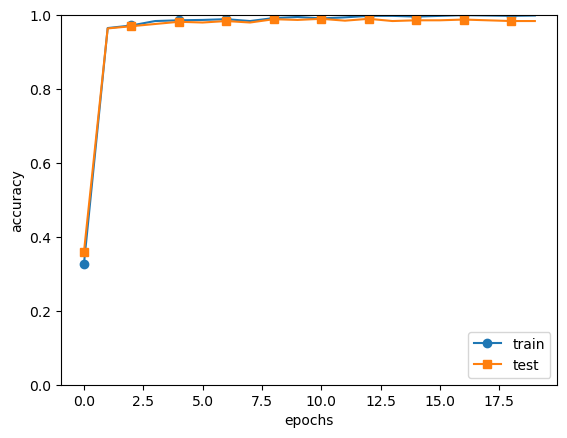

In [17]:
#SimpleConvNet으로 MNIST 데이터셋 학습

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from simple_convnet import SimpleConvNet
from trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#층 깊이에 따른 추출 정보 변화
#1번째 층의 합성곱 계층에서는 에지나 블롭 등의 저수준 정보가 추출, 그러면 CNN의 각 계층에서는 어떤 정보가 추출될까
#시각화 연구에 따르면, 계층이 깊어질수록 추출되는 정보는 더 추상화된다는 것을 알 수 있다.
#8층의 CNN => AlexNet : 합성곱 계층과 풀링 계층을 여러 겹 쌓고, 마지막으로 완전연결 계층을 거쳐 결과를 출력하는 구조
#딥러닝의 흥미로운 점은 합성곱 계층을 여러 겹 쌓으면, 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출된다는 것
#처음 층은 단순한 에지에 반응하고, 이어서 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화.

#대표적인 CNN (LeNet, AlexNet)

#LeNet : 손글씨 숫자를 인식하는 네트워크, 합성곱 계층과 풀링 계층을 반복하고, 마지막으로 완전연결 계층을 거치면서 결과를 출력
#현재의 CNN과 비교하면 첫 번째 차이는 활성화함수 => LeNet은 시그모이드 함수를 사용, 현재는 주로 ReLU 사용
#또, 원래의 LeNet은 서브샘플링을 하여 중간 데이터의 크기가 작아지지만 현재는 최대 풀링이 주류.

#AlexNet : 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력.
#활성화 함수로 ReLU 이용, LRN이라는 국소적 정규화를 실시하는 계층을 이용, 드롭아웃 사용


In [18]:
#딥러닝 : 층을 깊게 한 심층 신경망
#(Conv-ReLU-Conv-ReLU-Pool)x3 - (Affine-ReLU-Dropout) - (Affine-Dropout-Softmax)
#여기서 사용하는 합성곱 계층은 모두 3X3 크기의 작은 필터, 층이 깊어지면서 채널 수가 더 늘어나는 것이 특징 (16, 16, 32, 32, 64, 64로 늘어감)
#또 풀링 계층을 추가하여 중간 데이터의 공간 크기를 점차 줄여감, 그리고 마지막 단의 완전연결 계층에서는 드롭아웃 계층을 사용
#He 초깃값을 사용, Adam을 이용해 가중치 매개변수 갱신.

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from deep_convert import DeepConvNet
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

#매개변수 보관
network.save_params("deep_convnet_params.pkl")
print("Saved Network Parameters!")

train loss:2.275832539782595
=== epoch:1, train acc:0.091, test acc:0.096 ===
train loss:2.2938698781259377
train loss:2.266347331645524
train loss:2.3142577190088427
train loss:2.2820561550041294
train loss:2.3016174053452993
train loss:2.258142269357368
train loss:2.269525992302931
train loss:2.297214950469785
train loss:2.2716969984399933
train loss:2.3014792249549925
train loss:2.2834496526384758
train loss:2.292560794755244
train loss:2.253346097023868
train loss:2.282468377847051
train loss:2.229964955387171
train loss:2.1908067397068147
train loss:2.2350810041205436
train loss:2.2210208740587607
train loss:2.179581634583431
train loss:2.2577117854739415
train loss:2.2666435851296325
train loss:2.2105734869150284
train loss:2.2507681863771984
train loss:2.138146412265475
train loss:2.10859655795072
train loss:2.1904699846986353
train loss:2.0603051504527135
train loss:2.0777956008527014
train loss:1.9505692601599127
train loss:2.0800168406256714
train loss:2.018268564187659
train

In [ ]:
#정확도를 더 높일 수 있는 기술이나 힌트 => 앙상블 학습, 학습률 감소, 데이터 확장등
#데이터 확장 : 입력 이미지를 알고리즘을 동원해 '인위적'으로 확장하는 방법
#이미지를 회전하거나 세로로 이동하는 등 미세한 변화를 주어 이미지의 개수를 늘리는 것 (데이터가 몇 개 없을 때 효과적인 수단)

#층을 깊게 하는 이유 : 1.신경망의 매개변수 수가 줄어든다
#예를 들어 5x5 합성곱 연산 1회는 매개변수 수가 25개, 3x3 합성곱 연산 2회는 18개 => 즉, 층을 반복할수록 적어진다
#작은 필터를 겹쳐 신경망을 깊게 할 때 장점은 매개변수 수를 줄여 넓은 수용 영역을 소화할 수 있다는 데 있다.

#층을 깊게 하는 이유 : 2.학습의 효율성 (학습 데이터의 양을 줄여 고속으로 수행할 수 있다)
#예를 들어 '개'를 인식하는 문제에서 처음 층은 에지 학습에 전념하여 적은 데이털 학습할 수 있고 개가 등장하는 이미지보다 에지를 포함한 이미지는 많고, 에지의 패턴은 개라는 패턴보다 구조가 간단하기 때문.

#층을 깊게 하는 이유 : 3.정보를 계층적으로 전달할 수 있다
#예를 들어 에지를 추출한 층의 다음 층은 에지 정보를 쓸 수 있고, 고도의 패턴을 효과적으로 학습하리라 기대할 수 있다.
#즉, 각 층이 학습해야 할 문제를 '풀기 쉬운 단순한 문제'로 분해할 수 있어 효율적을 학습하리라 기대가능.



In [ ]:
#이미지넷 : 100만 장이 넘는 이미지를 담고 있는 데이터셋

#VGG : 합성곱 계층과 풀링 계층으로 구성되는 기본적인 CNN. 비중 있는 층(합성곱 계층, 완전연결 계층)을 모두 16층(혹은 19층)으로 심화한게 특징
#주목할 점은 3x3의 작은 필터를 사용한 합성곱 계층을 연속으로 거친다는 것, 합성곱 계층을 2~4회 연속으로 풀링 계층을 두어 크기를 절반을 줄이는 처리를 반복

#GoogLeNet : 세로 방향 깊이뿐 아니라 가로 방향도 깊다는 점이 특징
#가로 방향에 '폭'이 있다. 이를 인셉션 구조라 한다. => 크기가 다른 필터(와 풀링)를 여러 개 적용하여 그 결과를 결합, 이 구조를 하나의 빌딩 블록(구성 요소)으로 사용하는 것이 특징
#1x1 크기의 필터를 사용한 합성곱 계층을 많은 곳에서 사용 => 채널 쪽으로 크기를 줄이는 것, 매개변수 제거와 고속 처리에 기여

#ResNet : 층이 지나치게 깊으면 학습이 잘 되지 않고, 성능 저하가 발생하는 경우도 많다. => 스킵연결 도입
#스킵 연결 : 층의 깊이에 비례해 성능을 향상시킬 수 있게 한 것, 입력 데이터를 합성곱 계층을 건너뛰어 출력에 바로 더하는 구조
#역전파 때 스킵 연결이 신호 감쇠를 막아준다. (층이 깊어질수록 기울기가 작아지는 소실 문제를 줄여준다)
#VGG 신경망을 기반으로 스킵 연결을 도입하여 층을 깊게 함.

#전이학습 : 학습된 가중치(혹은 그 일부)를 다른 신경망에 복사한 다음, 그 상태로 재학습을 수행함.
#보유한 데이터셋이 적을 때 특히 유용한 방법.

#딥러닝 고속화
#AlexNet의 forward 처리에서 합성곱 계층 부분에 오랜 시간을 소요 => 이 연산을 어떻게 고속으로 효율적으로 하느냐가 딥러닝의 과제
#GPU로 범용 수치 연산을 수행하는 것 => GPU 컴퓨팅

#1회 학습에 걸리는 시간을 최대한 단축하고 싶다는 요구가 필연적으로 생겨남 => 딥러닝 학습을 수평확장하자는 아이디어('분산 학습')가 중요해짐.

#딥러닝의 활용 (컴퓨터 비전 분야 중심)

#사물 검출 : 이미지 속에 담긴 사물의 위치와 종류를 알아내는 기술
#R-CNN 방식 : 입력 이미지 -> 후보 영역 추출 -> CNN 특징 계산 -> 영역 분류
#주목할 곳 : 후보 영역 추출, CNN 특징 계산 => 후보 영역 추출에는 다양한 기법을 사용할 수 있고 R-CNN 논문에서는 Selective Search 기법 사용, 최근에는 이것까지 CNN으로 처리하는 Faster R-CNN 기법 등장

#분할 : 이미지를 픽셀 수준에서 분류하는 문제. 픽셀 단위로 객체마다 채색된 지도 데이터를 사용해 학습하고 추론할 때 입력 이미지의 모든 픽셀을 분류.
#모든 픽셀 각각을 추론하는 것이 가장 단순한 방법. 하지만 모든 픽셀을 하나하나 하기에는 긴 시간이 걸림. => FCN 기법이 고안 (단 한번의 forward 처리로 모든 픽셀의 클래스를 분류해주는 기법)
#FCN(합성곱 계층만으로 구성된 네트워크) : 완전연결 계층을 '같은 기능을 하는 합성곱 계층'으로 바꾼다.
#사물 인식에서 사용한 신경망의 완전연결 계층에서는 중간 데이터의 공간 볼륨(다차원 형태)을 1차원으로 변환하여 한 줄로 늘어선 노드들이 처리했으나, FCN에서는 공간 볼륨을 유지한 채 마지막 출력까지 처리가능
#마지막에 수행하는 확대는 이중 선형 보간에 의한 선형 확대이다. FCN에서는 이 선형 확대를 역합성곱 연산으로 구현해내고 있다.

#사진 캡션 생성 : 사진을 주면, 그 사진을 설명하는 글(사진 캡션)을 자동으로 생성하는 연구
#NIC 모델이 대표적 : 자연어를 다루는 순환 신경망(RNN)으로 구성, 순환적 관계를 갖는 신경망이며 자연어나 시계열 데이터 등의 연속된 데이터를 다룰 때 많이 활용
#NIC는 CNN으로 사진에서 특징을 추출하고, 그 특징을 RNN에 넘긴다. RNN은 CNN이 추출한 특징을 초깃값으로 해서 텍스트를 '순환적'으로 생성. (NIC는 2개의 신경망(CNN,RNN)을 조합한 간단한 구성)
#사진이나 자연어와 같은 여러 종류의 정보를 조합하고 처리하는 것을 멀티모달 처리라고 한다.
